# DSGRN Python Interface Tutorial
This notebook shows the basics of manipulating DSGRN with the python interface.

In [1]:
import DSGRN

## Network
The starting point of the DSGRN analysis is a network specification file. We have a network specification file "network.txt" we will load.

In [2]:
network = DSGRN.Network("network.txt")

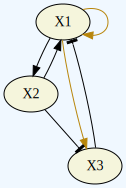

In [3]:
DSGRN.DrawGraph(network)

## ParameterGraph
Given a network, there is an associated "Parameter Graph", which is a combinatorial representation of parameter space.

In [4]:
parametergraph = DSGRN.ParameterGraph(network)

In [5]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 326592 nodes in the parameter graph.


## Parameter
The `ParameterGraph` class may be regarded as a factory which produces parameter nodes. In the DSGRN code, parameter nodes are referred to simply as "parameters" and are represented as "Parameter" objects.

In [6]:
parameterindex = 34892  # An arbitrarily selected integer in [0,32592)

In [7]:
parameter = parametergraph.parameter(parameterindex)

In [8]:
print(parameter)

[["X1",[3,3,"6D9000"],[0,2,1]],["X2",[1,2,"D"],[0,1]],["X3",[2,1,"8"],[0]]]


## DomainGraph
Let's compute the dynamics corresponding to this parameter node. In particular, we can instruct DSGRN to create a "domaingraph" object.

In [9]:
domaingraph = DSGRN.DomainGraph(parameter)

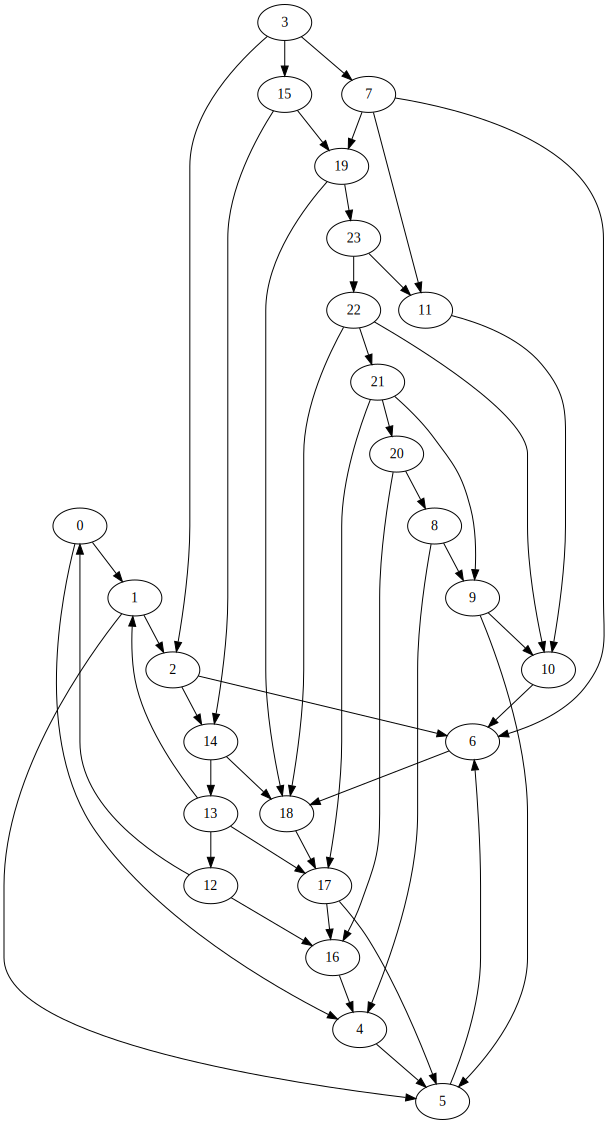

In [10]:
DSGRN.DrawGraph(domaingraph)

In [11]:
print(domaingraph.coordinates(5)) # ... I wonder what region in phase space domain 5 corresponds to.

[1, 1, 0]


## MorseDecomposition
Let's compute the partially ordered set of recurrent components (strongly connected components with an edge) of the domain graph.

In [12]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

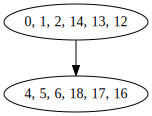

In [13]:
DSGRN.DrawGraph(morsedecomposition)

## MorseGraph
The final step in our analysis is the production of an annotated Morse graph.

In [14]:
morsegraph = DSGRN.MorseGraph(domaingraph, morsedecomposition)

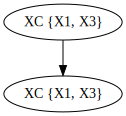

In [15]:
DSGRN.DrawGraph(morsegraph)